<a href="https://colab.research.google.com/github/JosenildoJunior/StatPyDataScience/blob/main/Fundamentos_Teste_de_Hip%C3%B3tese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fundamentos para os testes de hipóteses**

Um teste de hipótese é uma ferramenta estatística que permite determinar se há evidências suficientes para rejeitar uma afirmação sobre uma população. Essa afirmação é chamada de hipótese nula (H0).

**Estrutura:**

- Hipótese nula (H0): Afirmação que queremos testar.
- Hipótese alternativa (H1): Afirmação que será aceita se a H0 for rejeitada.

## **Amostra e População**

### **População**

População é o conjunto completo de dados que você deseja estudar.

Vamos importar a nossa população que nesse caso será a nossa base de dados, mas antes vamos importar as bibliotecas necessarias

In [15]:
# Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# Manipulação de dados
import pandas as pd

# Algébra linear
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Funções aleatórias
import random

# Funções estatísticas
import statistics
import scipy.stats

Importaremos a nossa população, que neste caso será a nossa base de dados. Antes disso, importaremos as bibliotecas necessárias.

In [17]:
# Importando o dataset
populacao = pd.read_csv('/content/drive/MyDrive/Estatística para ciência de dados/house_price.csv')

Observemos agora as dimensões da nossa população.

In [18]:
# Observando a dimensão dos dados
populacao.shape

(1460, 12)

Agora que já entendemos as dimensões da nossa população, vamos observar os primeiros registros.

In [19]:
# Observando os registros
populacao.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam


Dessa forma, podemos entender que a população nada mais é que um conjunto completo de elementos ou dados.

### **Amostra**

Amostra é um subconjunto da população que você coleta para fazer inferências sobre a população como um todo.

Agora que já temos a nossa população, vamos realizar uma amostragem aleatória simples.

#### **Amostragem Aleatória Simples**

A amostragem aleatória simples é um método de amostragem em que cada indivíduo da população tem a mesma chance de ser selecionado.

**Vantagens da Amostragem Aleatória Simples:**

- Representatividade: A amostragem aleatória simples tende a representar de forma justa a diversidade da população.

- Simplicidade: É fácil de entender e implementar, não requer conhecimento prévio sobre a população.

- Redução de Viés: Minimiza o risco de viés na seleção da amostra, pois cada elemento tem a mesma chance de ser escolhido.

**Desvantagens da Amostragem Aleatória Simples:**

- Ineficiência em Populações Pequenas: Em populações pequenas, pode não ser tão eficaz, pois a probabilidade de seleção pode resultar em amostras não tão representativas.

- Dificuldade com Elementos Raros: Pode ter dificuldade em capturar elementos raros se a amostra não for grande o suficiente.

Agora que já entendemos um pouco do conceito, seus prós e contras, vamos observar como é a aplicabilidade dessa amostragem.

In [20]:
# Selecionar uma amostra aleatória simples de tamanho 1000
amostragem_simples = populacao.sample(438)

Dessa forma, selecionamos aleatoriamente 438 indivíduos dessa base de dados. Como utilizamos a amostragem simples, todos os indivíduos tiveram a mesma chance de serem escolhidos. Vamos observar as dimensões dessa amostra.

In [21]:
# Observando as dimenções
amostragem_simples.shape

(438, 12)

Aqui podemos confirmar que a nossa amostragem foi um sucesso. Vamos observar rapidamente os primeiros registros presentes na amostra.

In [22]:
# Observando os primeiros registros
amostragem_simples.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
1459,1459,147500,5,6,3,6,1256,1256,1965,RL,AllPub,1Fam
1375,1375,239000,8,5,3,7,1571,1571,2007,RL,AllPub,1Fam
1416,1416,122500,4,6,4,11,2290,777,1885,RM,AllPub,2fmCon
700,700,312500,8,5,3,7,1800,1800,2002,RL,AllPub,1Fam
637,637,93000,5,4,3,7,1387,811,1954,RM,AllPub,2fmCon


#### **Amostragem Estratificada**

A amostragem estratificada é um método de amostragem em que a população é dividida em subgrupos (estratos) e, em seguida, uma amostra aleatória é selecionada de cada estrato.



**Vantagens da Amostragem Estratificada:**

- Representatividade Aprimorada: Garante que subgrupos importantes da população sejam representados proporcionalmente na amostra.

- Precisão Estatística: Reduz a variabilidade e aumenta a precisão das estimativas, especialmente quando há diferenças significativas entre estratos.

- Eficiência em Subpopulações: É eficaz em populações heterogêneas, onde a variabilidade interna é alta.

**Desvantagens da Amostragem Estratificada:**

- Complexidade na Implementação: Pode ser mais complexa de administrar e requer conhecimento prévio sobre a população para identificar estratos apropriados.

- Possíveis Dificuldades na Classificação: Determinar corretamente a estratificação pode ser desafiador, e classificar os elementos em estratos pode
envolver subjetividade.


Para nos auxiliar com esse tipo de amostragem, vamos importar uma biblioteca.

In [ ]:
# Importando a biblioteca para realizar a 'estratificação'
from sklearn.model_selection import StratifiedShuffleSplit

Agora, antes de aplicarmos essa técnica propriamente dita, vamos imaginar como queremos realizar a separação dos grupos, que são os estratos.

Vamos criar grupos com base no "SalePrice". Para isso, vamos observar as medidas referentes a essa coluna.

In [ ]:
# Calculando a média
media_sale = populacao['SalePrice'].mean()

# Calculando a mediana
mediana_sale = populacao['SalePrice'].median()

# Exibindo os valores
print(f" Média: {media_sale}\n Mediana: {mediana_sale}")

 Média: 180921.19589041095
 Mediana: 163000.0


Existe uma diferença entre a média e a mediana. Vamos observar um boxplot dessa coluna para observar a presença de outliers.

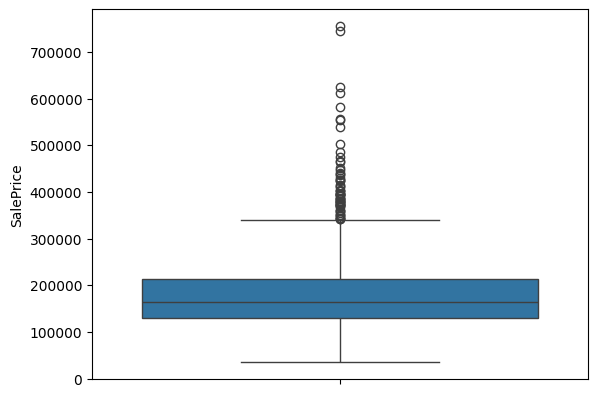

In [ ]:
# Observando o boxplot
sns.boxplot(populacao['SalePrice']);

Aqui podemos confirmar que a presença de outliers está estiçando a média dessa variável. Porém, é possível que essas casas mais caras tenham características interessantes para a nossa amostragem. Então, nesse caso, utilizaremos a média.

A ideia é criar uma variável categórica onde, para os valores de venda acima da média, será atribuído o valor > 180k. Quando isso não ocorrer, o valor será < 180k. Dito isso, podemos seguir adiante.

In [ ]:
# Criando a variável categórica com base na condição
populacao['Cat_price'] = np.where(populacao['SalePrice'] > media_sale, '>180k', '<180k')

Vamos observar como ficou o nosso dataset.

In [ ]:
# Observando os registros
populacao.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType,Cat_price
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam,>180k
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam,>180k
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam,>180k
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam,<180k
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam,>180k


Podemos observar que a variável realmente foi criada. Vamos observar os valores presentes nela.

In [ ]:
# Observando os valores
populacao['Cat_price'].value_counts()

<180k    900
>180k    560
Name: Cat_price, dtype: int64

Agora vamos calcular a porcentagem que esses valores representam na nossa base de dados.

In [ ]:
# Entendendo a porcentagem correspondente a cada valor na coluna
percent_menor_180k = 900 / len(populacao)
percent_maior_180k = 560 / len(populacao)

print(f"Porcentagem de preços acima de 180 mil dólares é: {round(percent_maior_180k, 2)}")
print(f"Porcentagem de preços abaixo de 180 mil dólares é: {round(percent_menor_180k, 2)}")

Porcentagem de preços acima de 180 mil dólares é: 0.38
Porcentagem de preços abaixo de 180 mil dólares é: 0.62


Dessa forma podemos observar que cerca de 62% da base possui valores de venda acima de 180 mil dólares e os 38% restantes possuem valor inferior a 180 mil dólares.

**Aplicando a amostragem estratificada**

Criando a função para aplicação da amostragem.

In [ ]:
# Definindo a função
def amostragem_estratificada(df, percentual):

  # Aplicando a estratificação, o tamanho da amostra deve ser em percentual
  split = StratifiedShuffleSplit(test_size = percentual, random_state = 6)

  # Criando um loop para as divisões geradas pela estratificação
  # Ignorando a primeira variável de retorno pois não será utilizada
  # Armazenando quais índices estão sendo armazenados na amostra atual
  for _, y in split.split(df, df['Cat_price']):

    # Seleciona as linhas do DataFrame df que pertencem à amostra atual
    df_y = df.iloc[y]

 # Retorna o DataFrame df_y contendo a amostra estratificada gerada.
  return df_y

Basicamente essa função realiza uma amostragem estratificada de um determinada DataFrame, garantindo que a proporção de diferentes valores da coluna seja mantida na amostra.

Para descobrirmos o percentual, será necessário realizar o seguinte passo.

In [ ]:
# Dividindo a quantidade de amostras que queremos pelo comprimento do nosso DataFrame.
num_amostras = 438
test_size_param = num_amostras / len(populacao)

# Exibindo os valores
print(test_size_param)

0.3


Agora vamos aplicar a função propriamente dita.

In [ ]:
# Atribuindo os valores em uma nova variável
amostragem_estratificada = amostragem_estratificada(populacao, 0.3)

# Observando as dimensões
amostragem_estratificada.shape

(438, 13)

Estamos coletando o mesmo número de amostras que a amostragem anterior. Podemos confirmar ao observarmos as dimensões dessa amostragem que a amostragem foi um sucesso.

In [ ]:
# Observando os primeiros registros
amostragem_estratificada.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType,Cat_price
1381,1381,237500,6,7,4,7,2117,1205,1970,RL,AllPub,1Fam,>180k
155,155,79000,6,5,2,5,1096,572,1924,RL,AllPub,1Fam,<180k
1399,1399,137450,6,6,3,7,1608,976,1925,RL,AllPub,1Fam,<180k
499,499,120000,5,7,2,5,912,912,1958,RL,AllPub,1Fam,<180k
763,763,337000,8,5,3,8,2365,1252,1999,RL,AllPub,1Fam,>180k


#### **Amostragem Sistemática**

É um método de amostragem em que os indivíduos são selecionados a intervalos regulares.

**Vantagens da Amostragem Sistemática:**

- Simplicidade na Implementação: É relativamente fácil de entender e aplicar, exigindo menos esforço na seleção dos elementos da amostra em comparação com outros métodos.


- Eficiência em Grandes Populações: É particularmente eficaz em populações grandes, pois permite uma seleção rápida e sistemática dos elementos da amostra.


- Redução de Viés: Pode reduzir o viés na seleção da amostra em comparação com métodos não sistemáticos, desde que a ordem dos elementos não esteja relacionada à característica de interesse.

**Desvantagens da Amostragem Sistemática:**

- Sensibilidade à Ordem dos Elementos: Se a ordem dos elementos estiver relacionada à característica de interesse, a amostragem sistemática pode introduzir viés na seleção da amostra.

- Risco de Padrões não Aleatórios: Se houver padrões não aleatórios na disposição dos elementos, a amostragem sistemática pode resultar em uma amostra não representativa.

- Dificuldade em Populações com Variação Temporal: Pode ser desafiador aplicar a amostragem sistemática em populações com variação temporal significativa, onde a ordem dos elementos pode mudar ao longo do tempo.

Vamos definir uma função para aplicarmos essa amostragem sempre que necessário.

In [40]:
# Definindo a função
def amostragem_sistematica(dataset, amostras):

    # Calcula o tamanho do intervalo entre as amostras
    intervalo = len(dataset) // amostras

    # Gera os índices das amostras sistemáticas
    indices = np.arange(0, len(dataset), step=intervalo)

    # Seleciona as amostras com base nos índices gerados
    amostra_sistematica = dataset.iloc[indices[:amostras]]

    # Retornando o DataFrame
    return amostra_sistematica

Agora vamos aplicar a função à nossa população.

In [41]:
# Chamando a função para criar a amostra sistemática
amostra_sistematica = amostragem_sistematica(populacao, 438)

# Verificando quantos registros foram armazenados
amostra_sistematica.shape

(438, 12)

Dessa forma, obtivemos o mesmo número de amostras que conseguimos ao utilizar as outras amostragens. As únicas diferenças foram a aplicabilidade de cada uma.

In [42]:
# Observando os registros
amostra_sistematica.head(10)

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
6,6,307000,8,5,3,7,1694,1686,2004,RL,AllPub,1Fam
9,9,118000,5,6,2,5,1077,991,1939,RL,AllPub,2fmCon
12,12,144000,5,6,2,4,912,912,1962,RL,AllPub,1Fam
15,15,132000,7,8,2,5,854,832,1929,RM,AllPub,1Fam
18,18,159000,5,5,3,6,1114,1114,2004,RL,AllPub,1Fam
21,21,139400,7,7,3,6,1108,637,1930,RM,AllPub,1Fam
24,24,154000,5,8,3,6,1060,1060,1968,RL,AllPub,1Fam
27,27,306000,8,5,3,7,1704,1704,2007,RL,AllPub,1Fam


Podemos observar que os dados estão sendo coletados de acordo com os intervalos que foram definidos na nossa função.

## **Teste de Hipóteses**

O teste de hipóteses é um procedimento para determinar se existe evidência suficiente para concluir que uma afirmação sobre uma população é verdadeira.

- Teste de Hipótese Nula (H0): É a afirmação que não há diferença significativa entre os grupos ou variáveis.

- Teste de Hipótese Alternativa (H1): É a afirmação que há uma diferença significativa entre os grupos ou variáveis.

Para um melhor entendimento e aplicação de um teste de hipóteses, vamos imaginar a aplicação do mesmo em quatro passos, sendo eles:

- 1. Especificar as hipóteses
- 2. Especificar o nível de significância
- 3. Calcular o p-valor
- 4. Interpretar o resultado

Antes de aplicarmos os passos, vamos entender mais alguns conceitos que serão importantes.

### **Testes Unicaudais e Bicaudais**


Como vimos anteriormente, o teste de hipóteses sempre terá duas hipóteses: a H0, que será a nula, e a Ha ou H1, que será a alternativa. Logo, é importante lembrar que o sinal de "=" sempre estará na hipótese nula. Dito isso, sempre que na hipótese alternativa tivermos um sinal de "<", isso indicará que temos um teste unilateral à esquerda. Quando tivermos um sinal de ">", isso indicará que temos um teste unilateral à direita. E quando tivermos um sinal de "≠", teremos um teste bicaldal.

*Observando a representação de testes unicaudais e bicaudais*



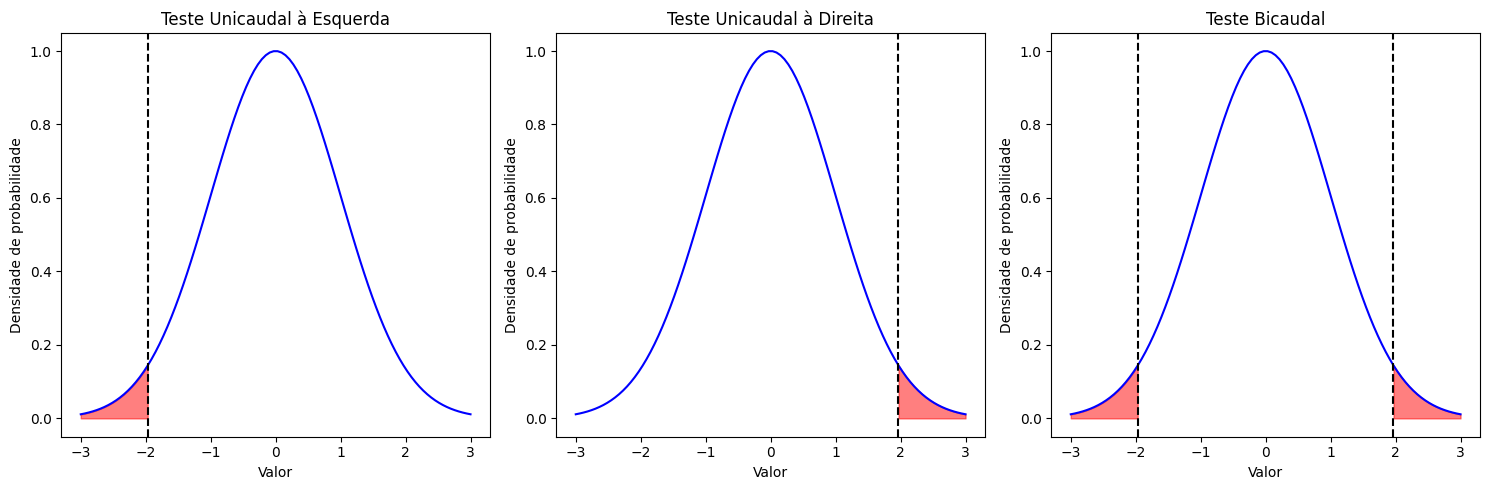

In [ ]:
# Bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

# Definindo os parâmetros dos testes
media = 0
desvio_padrao = 1
valor_critico_esquerdo = -1.96
valor_critico_direito = 1.96

# Gerando a distribuição normal
x = np.linspace(media - 3 * desvio_padrao, media + 3 * desvio_padrao, 100)
y = np.exp(-(x - media)**2 / (2 * desvio_padrao**2))

# Área de rejeição
area_rejeicao_esquerda = np.sum(y[x < valor_critico_esquerdo])
area_rejeicao_direita = np.sum(y[x > valor_critico_direito])

# Criando a figura
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotando o teste unicaudal à esquerda
axes[0].plot(x, y, color="blue")
axes[0].fill_between(x, y, where=x < valor_critico_esquerdo, color="red", alpha=0.5)
axes[0].set_xlabel("Valor")
axes[0].set_ylabel("Densidade de probabilidade")
axes[0].set_title("Teste Unicaudal à Esquerda")
axes[0].axvline(valor_critico_esquerdo, color="black", linestyle="dashed")

# Plotando o teste unicaudal à direita
axes[1].plot(x, y, color="blue")
axes[1].fill_between(x, y, where=x > valor_critico_direito, color="red", alpha=0.5)
axes[1].set_xlabel("Valor")
axes[1].set_ylabel("Densidade de probabilidade")
axes[1].set_title("Teste Unicaudal à Direita")
axes[1].axvline(valor_critico_direito, color="black", linestyle="dashed")

# Plotando o teste bicaudal
axes[2].plot(x, y, color="blue")
axes[2].fill_between(x, y, where=x < valor_critico_esquerdo, color="red", alpha=0.5)
axes[2].fill_between(x, y, where=x > valor_critico_direito, color="red", alpha=0.5)
axes[2].set_xlabel("Valor")
axes[2].set_ylabel("Densidade de probabilidade")
axes[2].set_title("Teste Bicaudal")
axes[2].axvline(valor_critico_esquerdo, color="black", linestyle="dashed")
axes[2].axvline(valor_critico_direito, color="black", linestyle="dashed")

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

Dessa forma, podemos ter uma noção visual de como são esses testes. Agora, vamos entender um pouco mais sobre as hipóteses possíveis para a representação desses gráficos:

**Unicaudal à esquerda:**

- H0: μ1 ≥ μ2
- Ha: μ1 < μ2

**Unicaudal à direita:**

- H0: μ1 ≤ μ2
- Ha: μ1 > μ2

**Bicaudal:**

- H0: μ1 = μ2
- Ha: μ1 ≠ μ2

**Dica para identificar o tipo de teste:**

Uma dica para entendermos qual dos testes foi definido quando escolhemos a hipótese é observar para que lado a hipótese alternativa está apontando. Por exemplo:

No teste unicaudal à esquerda, temos um sinal de menor que "<". Podemos interpretar esse sinal como uma seta. Logo, basta olharmos para que lado ele está apontando para entendermos para que lado é a nossa cauda.
Se o sinal for diferente "≠", então o teste será bicaudal.

Agora vamos ver como funciona um teste de hipoteses na pratica, imagine que um delivery nos informou que seu tempo médio de entrega é de 30 minutos, mas queremos não estamos muito certo desses 30 minutos então decidimos realizar um teste de hipoteses

### **Aplicando o teste**

Desconfiamos que a entrega não demora 30 minutos e sim um pouco mais, então coletamos uma amostra

In [8]:
# Definindo a média e o desvio padrão
media = 32
desvio_padrao = 8

# Gerando os dados com distribuição normal
dados = np.random.normal(loc=media, scale=desvio_padrao, size=30)  # Gerando 1000 valores

Agora que já temos nossa amostra vamos observar as medidas da mesma

In [9]:
# Calculando a média
media_dados = dados.mean()

# Calculando o desvio
desvio_dados = dados.std()

# Exibindo a média e o desvio
print(f"A média é: {media_dados}\nO desvio é: {desvio_dados}")

A média é: 34.44110174782089
O desvio é: 7.536835609707955


Achamos uma média de 34 e um desvio padrão de 8 agora que já temos essas médidas vamos seguir adiante com o nosso teste

#### **Passo 1 (Especificando as hipóteses)**

Levando em consideração que o dono do delivery nos informou que o tempo médio de entrega é de 30 minutos ou menos logo nossas hipóteses irão ficar da seguinte forma:

H0: μ1 ≤ 30

Ha: μ1 > 30

- Na hipotese nula estamos dizendo que a média de entrega é menor ou igual a 30 que foi exatamente o que o dono do delivery falou

- Na hipotese alternativa estamos dizendo que a média de entrega é maior que 30 que é a nossa suspeita

Dessa forma ao observar a direção da 'seta' da hipotese alternativa podemos dizer que o nosso teste é unicaudal a direita


Agora podemos seguir adiante para o proximo passo

#### **Passo 2 (Especificando o nível de significância)**

O nível de significância ($
α$) é a probabilidade de cometer um erro do tipo I ao rejeitar incorretamente a hipótese nula em um teste de hipóteses estatísticas.

Mas o que seria esse erro do tipo 1 ?

Existem dois tipos de erros, sendo eles o erro do tipo 1 e do tipo 2 vamos entender um pouco mais sobre eles:

- **Erro do tipo I:** Também conhecido como **falso positivo**, ocorre quando rejeitamos erroneamente a hipótese nula, mesmo que ela seja verdadeira. Em outras palavras, é a conclusão de que existe uma diferença significativa quando na verdade não há.

- **Erro do tipo II:** Também conhecido como **falso negativo**, acontece quando falhamos em rejeitar a hipótese nula, mesmo que ela seja falsa. Isso significa que não identificamos uma diferença significativa quando realmente existe.

Normalmente valor padrão usado para o nível de significância é 0.05 (ou 5%). Isso significa que há uma probabilidade de 5% de cometer um erro do tipo I ao rejeitar a hipótese nula.

Um nível de significância mais baixo implica que o pesquisador é mais criterioso ao descartar a hipótese nula, precisando de mais evidências para isso. Por outro lado, um nível de significância mais alto facilita o descarte da hipótese nula, o que pode aumentar a probabilidade de cometer um erro do tipo I.

Nesse caso vamos utilizar o valor de alpha padrão mesmo que será de 5%

In [ ]:
# Definindo o valor de alpha
alhpa = 0.05

#### **Passo 3 (Calculando o p-valor)**

In [ ]:
# Em breve!!